# 03 - Portfolio Simulation

In this notebook, we generate and evaluate a large number of random portfolios using historical log return data.

Each portfolio is assigned random weights, and we calculate its:
- **Expected return** using the mean of asset returns
- **Risk (standard deviation)** using the covariance matrix
- **Sharpe ratio** assuming a fixed risk-free rate

This simulation gives us insight into the risk-return trade-offs possible with these assets and prepares us for optimization.


## Why Simulate Portfolios?

Before using optimization to mathematically determine the best portfolio allocations, we first simulate thousands of **random portfolios** to build intuition about the risk-return landscape.

Each simulated portfolio:
- Assigns random weights to each asset (ensuring they sum to 1)
- Computes the portfolio’s **expected return** using historical mean returns
- Calculates **risk** using the covariance matrix of returns
- Evaluates performance using the **Sharpe ratio**

By plotting these portfolios in risk-return space, we can:
- Visualize the full range of possible outcomes given our asset set
- Observe the trade-off between risk and return
- Identify high-performing portfolios, such as:
  - The **maximum Sharpe ratio portfolio**
  - The **minimum risk portfolio**

This exploratory step helps us **understand diversification**, assess portfolio behavior, and prepare for more precise optimization techniques in the next notebook.

### Load Data

In [1]:
import numpy as np
import pandas as pd

mean_returns = pd.read_csv("../results/mean_returns.csv", index_col=0).squeeze()
cov_matrix = pd.read_csv("../results/cov_matrix.csv", index_col=0)

tickers = mean_returns.index.tolist()

### Simulate Random Portfolios

In [2]:
num_portfolios = 10_000
results = np.zeros((3, num_portfolios))  # rows: return, risk, Sharpe ratio
weights_list = []

risk_free_rate = 0.02 / 252  # assuming daily log returns, convert 2% annual RF to daily

for i in range(num_portfolios):
    # Random weights that sum to 1
    weights = np.random.random(len(tickers)) # generate a random vector of values, one per asset
    weights /= np.sum(weights) # divide each value by the total sum so that all weights add up to 1
    weights_list.append(weights)

    # Expected return and risk
    port_return = np.dot(weights, mean_returns)
    port_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (port_return - risk_free_rate) / port_std

    # Store results
    results[0, i] = port_return
    results[1, i] = port_std
    results[2, i] = sharpe_ratio

# Convert to DataFrame
results_df = pd.DataFrame(results.T, columns=["Return", "Risk", "Sharpe"])

### Plot Portfolios in Risk-Return Space

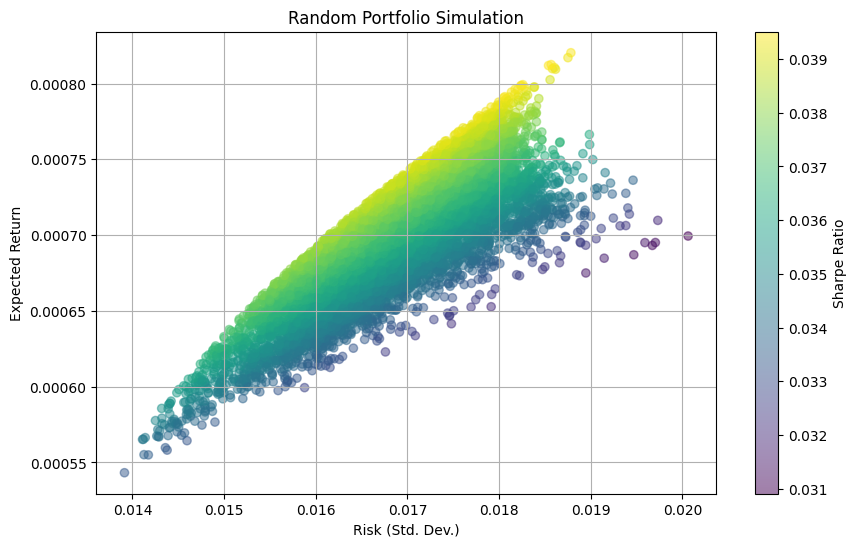

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(results_df["Risk"], results_df["Return"], c=results_df["Sharpe"],
                      cmap="viridis", alpha=0.5)
plt.colorbar(scatter, label="Sharpe Ratio")
plt.xlabel("Risk (Std. Dev.)")
plt.ylabel("Expected Return")
plt.title("Random Portfolio Simulation")
plt.grid(True)
plt.show()

In [4]:
# Sort portfolios by Risk
sorted_df = results_df.sort_values("Risk")

# Initialize a list for the efficient frontier
efficient_portfolios = []

# Track the highest return seen so far
max_return_so_far = -np.inf

# Loop through sorted portfolios and pick only those that push the frontier up
for i, row in sorted_df.iterrows():
    if row["Return"] > max_return_so_far:
        efficient_portfolios.append(row)
        max_return_so_far = row["Return"]

efficient_df = pd.DataFrame(efficient_portfolios)


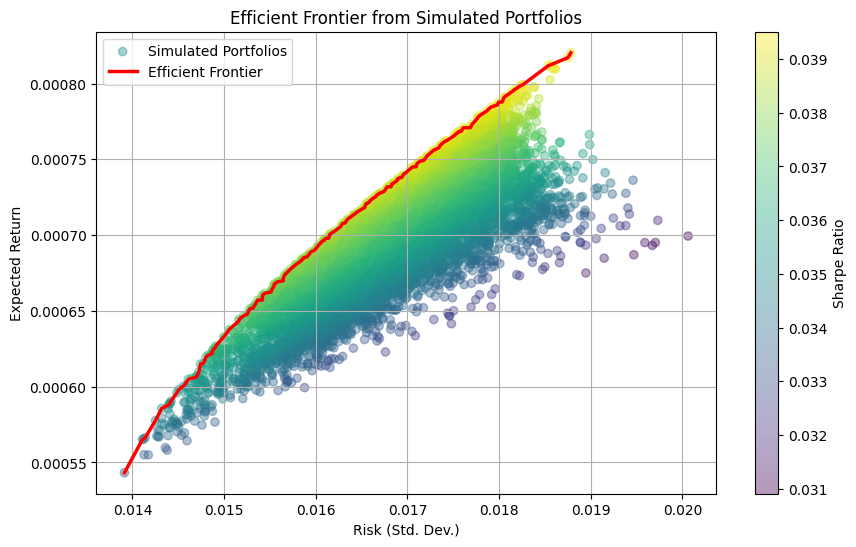

In [5]:
plt.figure(figsize=(10, 6))

# All simulated portfolios
plt.scatter(results_df["Risk"], results_df["Return"], c=results_df["Sharpe"],
            cmap="viridis", alpha=0.4, label="Simulated Portfolios")

# Efficient frontier line
plt.plot(efficient_df["Risk"], efficient_df["Return"], color="red", linewidth=2.5, label="Efficient Frontier")

# Labels and legend
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Risk (Std. Dev.)")
plt.ylabel("Expected Return")
plt.title("Efficient Frontier from Simulated Portfolios")
plt.legend()
plt.grid(True)
plt.show()
